In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def stretch_values(df, column, factor):
    # Obliczamy minimalną, maksymalną oraz średnią wartość w kolumnie
    min_value = df[column].min()
    max_value = df[column].max()
    mean = df[column].mean()
    
    # Funkcja do skalowania wartości
    def scale(x):
        if x < mean:
            # Skalowanie wartości poniżej średniej w kierunku minimalnej wartości
            return max(mean - (mean - x) * factor, 0)  # Zapewnienie, że wartość nie spada poniżej zera
        else:
            # Skalowanie wartości powyżej średniej w kierunku maksymalnej wartości
            return min(mean + (x - mean) * factor, max_value)
    
    # Stosujemy skalowanie do kolumny
    df[f'{column}_stretched'] = df[column].apply(scale)
    
    return df





In [26]:
# Tworzenie przykładowego DataFrame
data = {'Values': np.linspace(20, 120, 100)}
df = pd.DataFrame(data)

# Zastosowanie funkcji stretch_values
factor = 2.5  # Możemy zmieniać ten współczynnik, aby zobaczyć różne efekty rozciągania
stretched_df = stretch_values(df, 'Values', factor)


In [27]:
df

,Values,Values_stretched
0,20.000000,0.0
1,21.010101,0.0
2,22.020202,0.0
3,23.030303,0.0
4,24.040404,0.0
...,...,...
95,115.959596,120.0
96,116.969697,120.0
97,117.979798,120.0
98,118.989899,120.0


<Axes: >

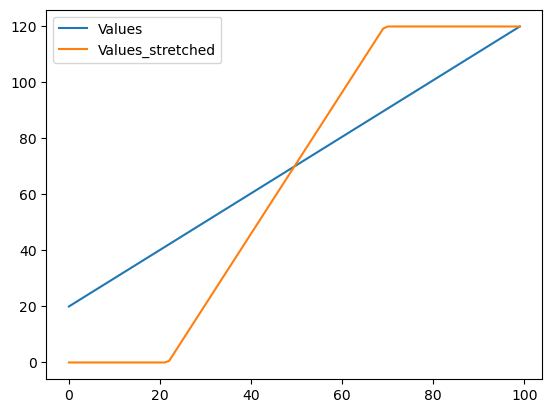

In [28]:
df.plot()